# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('geo_comment.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70382 entries, 0 to 70381
Data columns (total 5 columns):
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.2+ MB


In [4]:
df.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [5]:
# уберем дупликаты
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11699 entries, 0 to 70381
Data columns (total 5 columns):
x                11699 non-null float64
y                11699 non-null float64
comment_class    11699 non-null int64
multiplier       11699 non-null int64
comment          11699 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 548.4+ KB


In [7]:
# координаты нулевого километра Москвы
zero_kilom_y = 55.75578
zero_kilom_x = 37.61786
# перевод 1 гр. широты и долготы в км
y_scale = (2*np.pi*6370)/360
x_scale = np.cos(np.deg2rad(zero_kilom_y))*y_scale

In [8]:
# создадим два признака с координатами x и y в км с началом координат на нулевом км.
# тогда по осям x и y будут одинаковые масштабы.
df['x_km'] = (df['x'] - zero_kilom_x)*x_scale
df['y_km'] = (df['y'] - zero_kilom_y)*y_scale

In [9]:
df.head()

,x,y,comment_class,multiplier,comment,x_km,y_km
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,-0.340587,2.409661
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...,-0.340587,2.409661
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...,-0.911027,-1.520018
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...,-3.712051,-3.004238
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...,-3.217499,-2.666703


In [10]:
X = df[['x_km', 'y_km', 'comment_class']]

In [11]:
X.head()

,x_km,y_km,comment_class
0,-0.340587,2.409661,-1
1,-0.340587,2.409661,-1
2,-0.911027,-1.520018,-1
3,-3.712051,-3.004238,-1
4,-3.217499,-2.666703,-1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

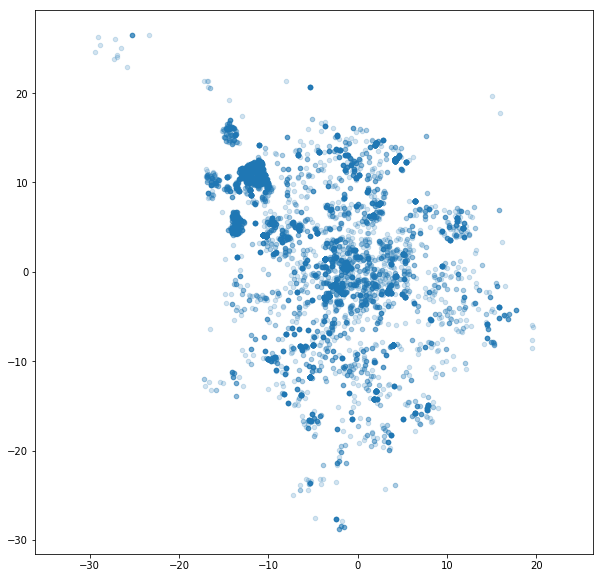

In [13]:
# Посмотрим на расположение и кучность голосов безотносительно голосов.
fig = plt.figure(figsize=(10,10))
ax = plt.scatter(x=X['x_km'], y=X['y_km'], s=20, alpha=0.2)
_ = plt.axis('equal')

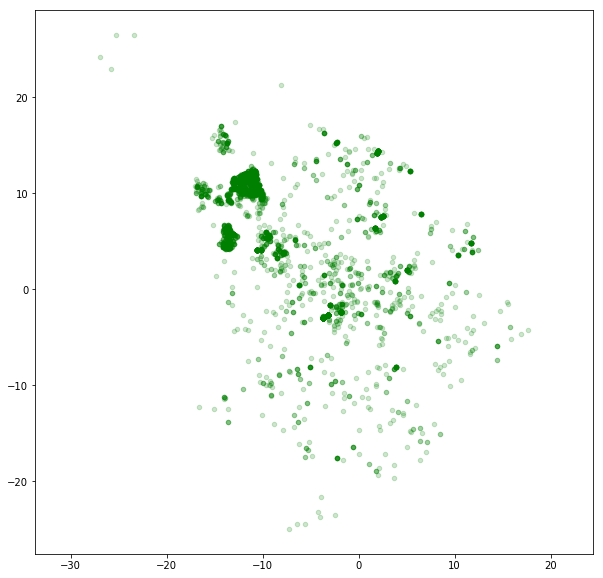

In [14]:
# Посмотрим на расположение и кучность голосов 'за'.
fig = plt.figure(figsize=(10,10))
ax = plt.scatter(x=X[X['comment_class']==1]['x_km'], y=X[X['comment_class']==1]['y_km'], s=20, alpha=0.2, c='g')
_ = plt.axis('equal')

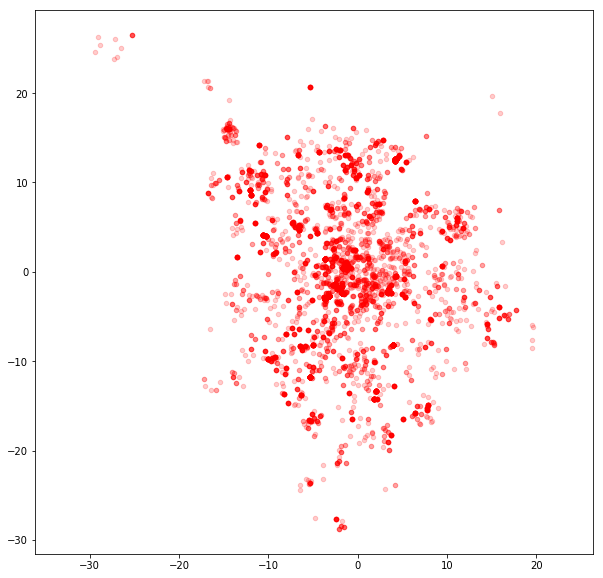

In [15]:
# Посмотрим на расположение и кучность голосов 'против'.
fig = plt.figure(figsize=(10,10))
ax = plt.scatter(x=X[X['comment_class']==-1]['x_km'], y=X[X['comment_class']==-1]['y_km'], s=20, alpha=0.2, c='r')
_ = plt.axis('equal')

Как, видно, голоса 'против' расположены гораздо равномерней. В то время как голоса 'за' сильно разрежены и лишь в некоторых районах имеют очень высокую плотность.

In [16]:
from sklearn.cluster import KMeans

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [17]:
# подберем оптимальное количество кластеров для KMeans
k_inertia = []
ks = range(1,50)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X[['x_km', 'y_km']])
    k_inertia.append(clf_kmeans.inertia_)

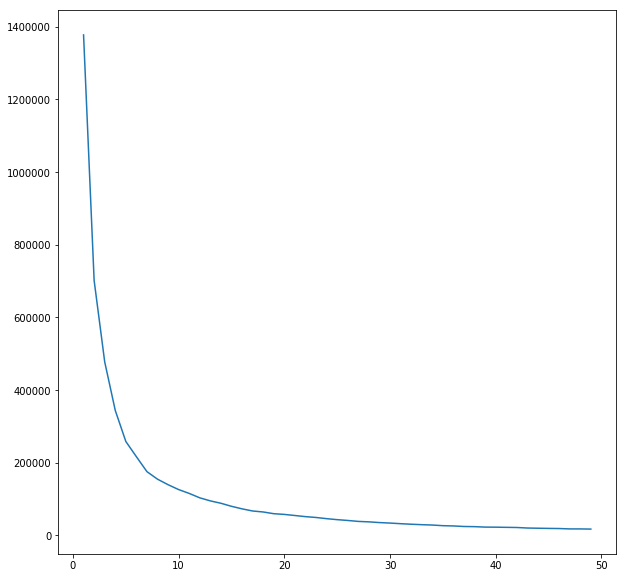

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks, k_inertia)

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

In [19]:
diff = np.diff(k_inertia)

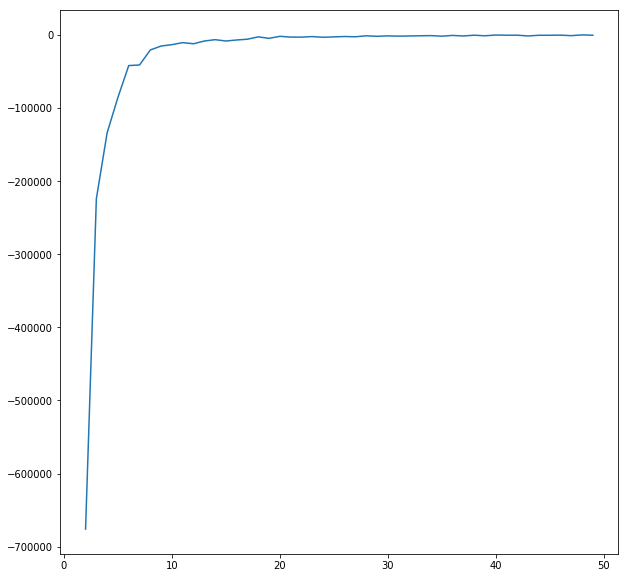

In [20]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks[1:], diff)

Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [21]:
diff_r = diff[1:] / diff[:-1]

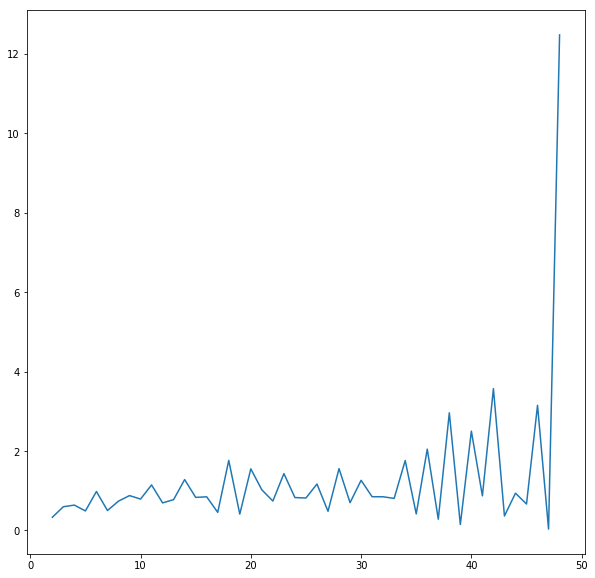

In [22]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks[1:-1], diff_r)

In [23]:
pd.DataFrame({'diff': diff_r[:80]}).sort_values('diff').head()

,diff
45,0.034199
37,0.150477
35,0.282683
0,0.331504
41,0.364266


In [24]:
np.argmin(diff_r)

45

In [25]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

47

In [221]:
clt_kmeans = KMeans(n_clusters=k_opt)
clusters = clt_kmeans.fit_predict(X)
centers = clt_kmeans.cluster_centers_

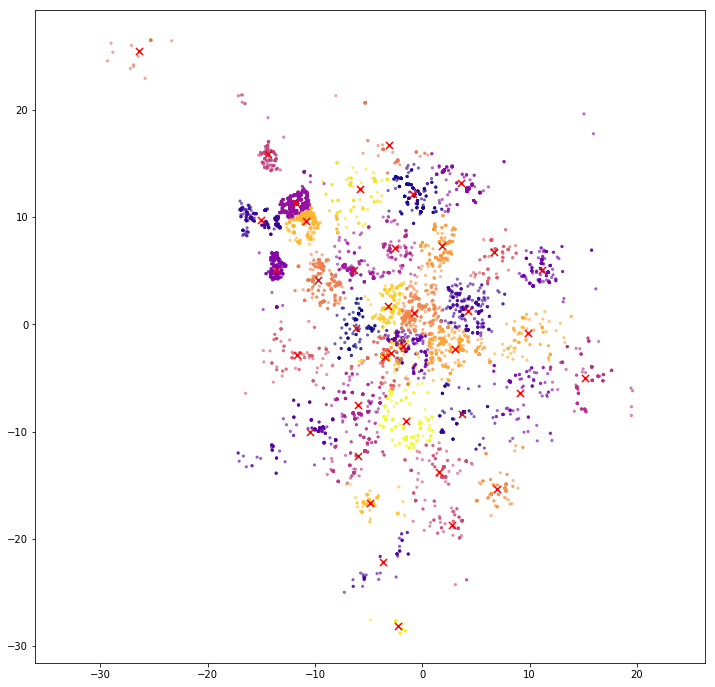

In [222]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X['x_km'], y=X['y_km'], c=clusters, s=5, cmap='plasma', alpha=0.5)
ax_2 = plt.scatter(centers[:, 0], centers[:, 1], s=50, c='r', marker='x')
_ = plt.axis('equal')

* аналогично исследовать скопления голосов за и против отдельно

In [36]:
X_pos_vote = X[X['comment_class']==1][['x_km', 'y_km']]
X_neg_vote = X[X['comment_class']==-1][['x_km', 'y_km']]

### Голоса 'за'

In [39]:
# подберем оптимальное количество кластеров для KMeans
k_inertia = []
ks = range(1,50)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_pos_vote)
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

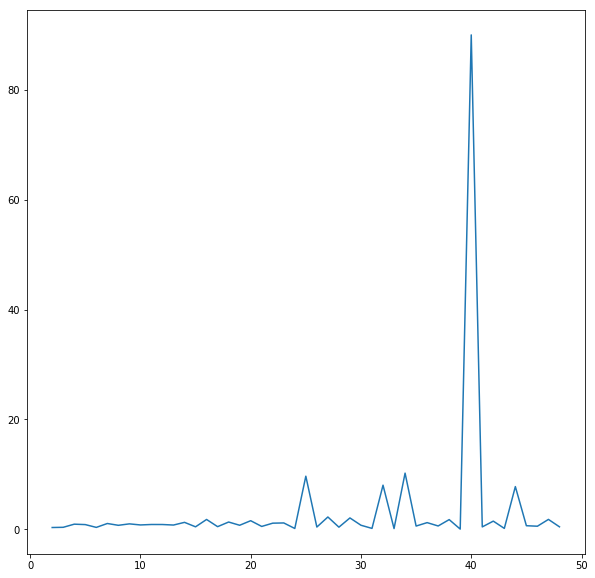

In [40]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks[1:-1], diff_r)

In [41]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

39

In [227]:
clt_kmeans = KMeans(n_clusters=k_opt)
clusters = clt_kmeans.fit_predict(X_pos_vote)
centers = clt_kmeans.cluster_centers_

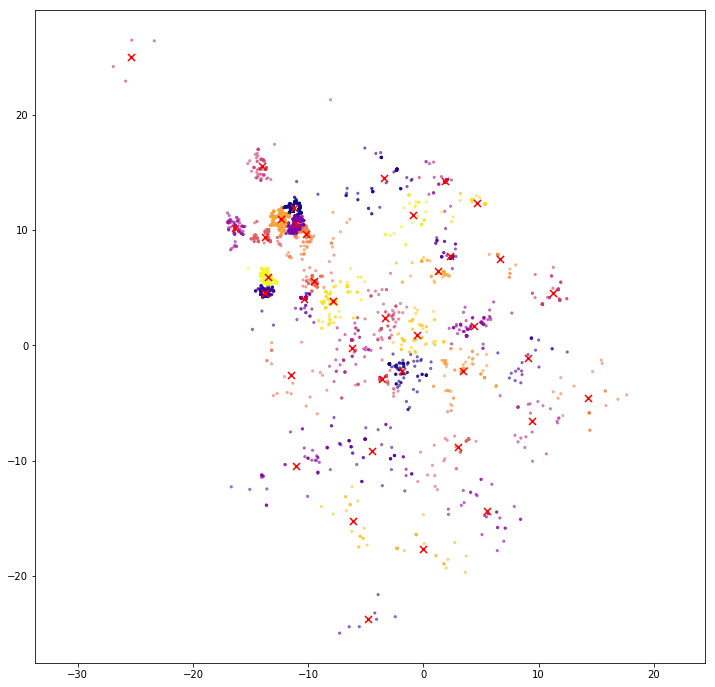

In [229]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X_pos_vote['x_km'], y=X_pos_vote['y_km'], c=clusters, s=5, cmap='plasma', alpha=0.5)
ax_2 = plt.scatter(centers[:, 0], centers[:, 1], s=50, c='r', marker='x')
_ = plt.axis('equal')

### Голоса 'против'

In [44]:
# подберем оптимальное количество кластеров для KMeans
k_inertia = []
ks = range(1,50)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_neg_vote)
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks[1:-1], diff_r)

In [ ]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

In [225]:
clt_kmeans = KMeans(n_clusters=k_opt)
clusters = clt_kmeans.fit_predict(X_neg_vote)
centers = clt_kmeans.cluster_centers_

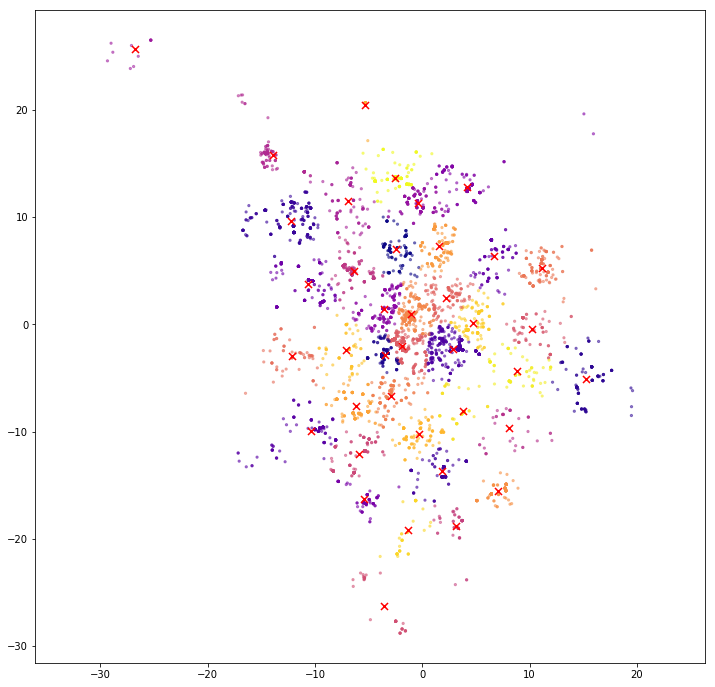

In [226]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X_neg_vote['x_km'], y=X_neg_vote['y_km'], c=clusters, s=5, cmap='plasma', alpha=0.5)
ax_2 = plt.scatter(centers[:, 0], centers[:, 1], s=50, c='r', marker='x')
_ = plt.axis('equal')

* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*

In [62]:
from sklearn.cluster import DBSCAN

In [166]:
from sklearn.preprocessing import QuantileTransformer
from collections import Counter

In [230]:
clt_dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = clt_dbscan.fit_predict(X[['x_km', 'y_km']])

In [231]:
Counter(clusters)

Counter({0: 63,
         1: 1850,
         2: 958,
         3: 97,
         4: 65,
         116: 9,
         -1: 1288,
         5: 56,
         6: 117,
         121: 13,
         7: 297,
         8: 25,
         9: 47,
         105: 12,
         10: 56,
         11: 18,
         12: 240,
         13: 41,
         14: 34,
         15: 51,
         16: 14,
         102: 11,
         98: 12,
         17: 40,
         18: 12,
         19: 20,
         20: 11,
         37: 11,
         21: 103,
         22: 291,
         23: 24,
         24: 158,
         25: 114,
         26: 36,
         27: 26,
         28: 38,
         39: 11,
         35: 6,
         29: 52,
         30: 169,
         31: 12,
         32: 55,
         33: 18,
         34: 22,
         99: 11,
         36: 10,
         38: 32,
         40: 168,
         41: 31,
         42: 46,
         43: 19,
         44: 10,
         45: 25,
         46: 10,
         47: 29,
         117: 12,
         48: 14,
         49: 20,
       

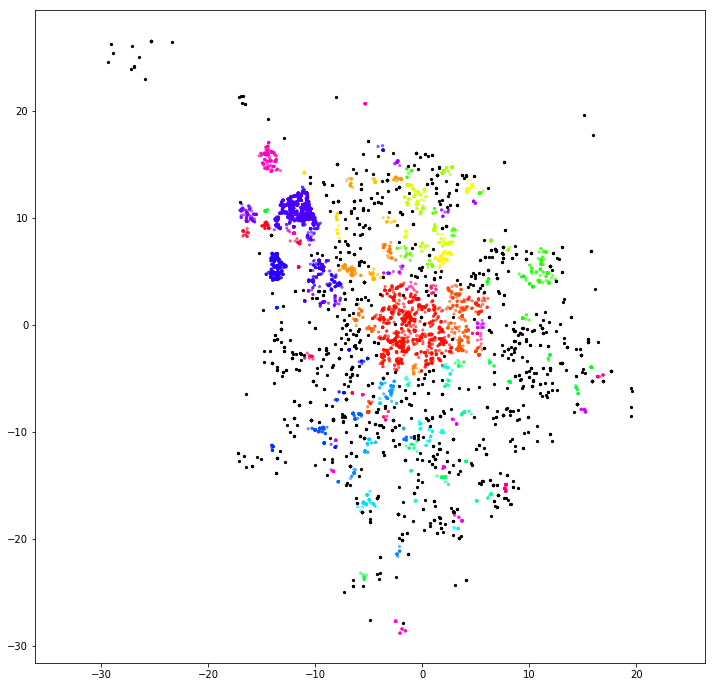

In [233]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X[clusters!=-1]['x_km'], y=X[clusters!=-1]['y_km'], 
                 c=clusters[clusters!=-1], s=5, cmap='hsv', alpha=0.5)
# черные точки - неактивно голосовавшие районы.
ax_2 = plt.scatter(x=X[clusters==-1]['x_km'], y=X[clusters==-1]['y_km'], s=5, c='k')
_ = plt.axis('equal')

Активно голосовавшие районы

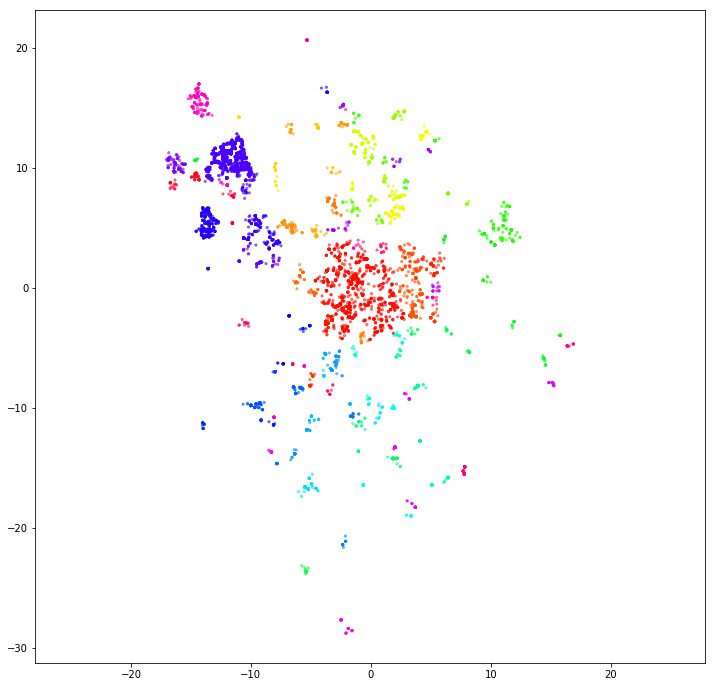

In [234]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X[clusters!=-1]['x_km'], y=X[clusters!=-1]['y_km'], 
                 c=clusters[clusters!=-1], s=5, cmap='hsv', alpha=0.5)
_ = plt.axis('equal')

Распределение голосов на карте google maps

In [246]:
import gmaps

In [268]:
with open('API_key.txt') as f:
    api_key = f.readline().strip()

In [270]:
gmaps.configure(api_key=api_key)

In [271]:
locations = df[['y', 'x']] 

In [272]:
df.head(1)

,x,y,comment_class,multiplier,comment,x_km,y_km
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,-0.340587,2.409661


In [273]:
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer_pos = gmaps.heatmap_layer(locations[df['comment_class']==1])
heatmap_layer_neg = gmaps.heatmap_layer(locations[df['comment_class']==-1])

heatmap_layer.max_intensity = 70
heatmap_layer_pos.max_intensity = 70
heatmap_layer_neg.max_intensity = 70
heatmap_layer.point_radius = 8
heatmap_layer_pos.point_radius = 8
heatmap_layer_neg.point_radius = 8

figure_layout = {
    'width': '650px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px'
}

In [274]:
# все голоса
fig = gmaps.figure(map_type='TERRAIN', layout=figure_layout)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='650px'))

In [275]:
# голоса за
fig = gmaps.figure(map_type='TERRAIN', layout=figure_layout)
fig.add_layer(heatmap_layer_pos)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='650px'))

In [276]:
# голоса против
fig = gmaps.figure(map_type='TERRAIN', layout=figure_layout)
fig.add_layer(heatmap_layer_neg)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='650px'))